In [1]:
# Import Data
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
df1 = pd.read_csv('./Data/DT_Jan16_XT.csv')
df2 = pd.read_csv('./Data/DT_Jan16_YT.csv')
# Split Data - Train & Test
del df2['Unnamed: 0']
del df2['Date']
print(df2.columns.values)
n_train = 8000
X = df1.values
Y = df2.values
Y1 = df2['Appm(bttm)'].values
Y2 = df2['Bppm(top)'].values


['Appm(bttm)' 'Bppm(top)']


In [2]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X[:8900])
Y = scaler.fit_transform(Y[:8900])

In [3]:
#train_X, train_y = train[:, :-1], train[:, -1]
n_train = 8000
train_X = X[:n_train, :]
test_X = X[n_train:,:]
train_Y = Y[:n_train,1]
test_Y = Y[n_train:,1]

In [4]:
print(train_Y[7000])

0.922199105586


In [5]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape

(8000, 1, 53)

In [6]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

Using TensorFlow backend.


In [7]:
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_Y, epochs=100, batch_size=100, validation_data=(train_X, train_Y), verbose=1, shuffle=False)


Train on 8000 samples, validate on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 0s - loss: 0.2531 - val_loss: 0.0751
Epoch 2/100
8000/8000 [==============================] - 0s - loss: 0.0572 - val_loss: 0.0518
Epoch 3/100
8000/8000 [==============================] - 0s - loss: 0.0411 - val_loss: 0.0455
Epoch 4/100
8000/8000 [==============================] - 0s - loss: 0.0328 - val_loss: 0.0369
Epoch 5/100
8000/8000 [==============================] - 0s - loss: 0.0283 - val_loss: 0.0306
Epoch 6/100
8000/8000 [==============================] - 0s - loss: 0.0236 - val_loss: 0.0330
Epoch 7/100
8000/8000 [==============================] - 0s - loss: 0.0219 - val_loss: 0.0316
Epoch 8/100
8000/8000 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0262
Epoch 9/100
8000/8000 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0250
Epoch 10/100
8000/8000 [==============================] - 0s - loss: 0.0181 - val_loss: 0.0218
Epoch 11/10

8000/8000 [==============================] - 0s - loss: 0.0121 - val_loss: 0.0159
Epoch 87/100
8000/8000 [==============================] - 0s - loss: 0.0118 - val_loss: 0.0147
Epoch 88/100
8000/8000 [==============================] - 0s - loss: 0.0114 - val_loss: 0.0145
Epoch 89/100
8000/8000 [==============================] - 0s - loss: 0.0114 - val_loss: 0.0145
Epoch 90/100
8000/8000 [==============================] - 0s - loss: 0.0112 - val_loss: 0.0145
Epoch 91/100
8000/8000 [==============================] - 0s - loss: 0.0114 - val_loss: 0.0145
Epoch 92/100
8000/8000 [==============================] - 0s - loss: 0.0111 - val_loss: 0.0140
Epoch 93/100
8000/8000 [==============================] - 0s - loss: 0.0114 - val_loss: 0.0146
Epoch 94/100
8000/8000 [==============================] - 0s - loss: 0.0110 - val_loss: 0.0137
Epoch 95/100
8000/8000 [==============================] - 0s - loss: 0.0112 - val_loss: 0.0143
Epoch 96/100
8000/8000 [==============================] - 0s - 

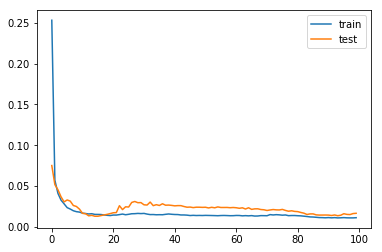

In [8]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

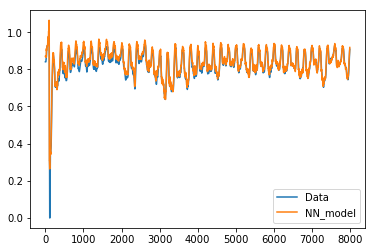

In [9]:
y_pred = model.predict(train_X)
pyplot.plot(train_Y, label='Data')
pyplot.plot(y_pred, label='NN_model')
pyplot.legend()
pyplot.show()

In [10]:
from sklearn import metrics
metrics.r2_score(train_Y,y_pred)
#metrics.mean_squared_error(train_Y,y_pred)

0.86941102229695333

In [12]:
print(metrics.r2_score(test_Y,model.predict(test_X)))
print(metrics.mean_squared_error(train_Y,y_pred))
print(metrics.mean_squared_error(test_Y,model.predict(test_X)))

0.937403179092
0.000742578225247
0.000130939042342


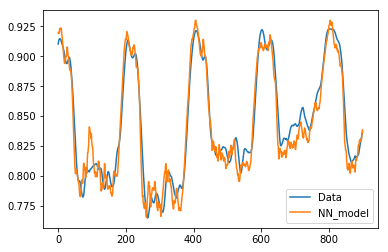

In [13]:
y_pred_test = model.predict(test_X)
pyplot.plot(test_Y, label='Data')
pyplot.plot(y_pred_test, label='NN_model')
pyplot.legend()
pyplot.show()